<a href="https://colab.research.google.com/github/Waishani/SentimentAnalysis/blob/main/twitterdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [ ]:
#load the data
from google.colab import files
uploaded=files.upload()

Saving Tweets.csv to Tweets (1).csv


In [ ]:
#get the data
tweets_df=pd.read_csv('Tweets.csv')

In [ ]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.shape

(14640, 15)

In [ ]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Check if any of the columns have unique values
nonunique_cols = [featr for featr in tweets_df.columns if len(tweets_df[featr].unique()) <2]
nonunique_cols

[]

missing value analysis:


In [ ]:
#Check for missing values
100*tweets_df.isna().sum()/len(tweets_df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

we observe that airline_sentiment_gold, negativereason_gold and tweet_coord have more tha 90% of missing values, let us drop them as they don't provide any constructive feedback

In [ ]:
tweets_df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace =True)

In [ ]:
100*tweets_df.isna().sum()/len(tweets_df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [ ]:
tweets_df[['negativereason', 'negativereason_confidence', 'tweet_location', 'user_timezone']].head()

,negativereason,negativereason_confidence,tweet_location,user_timezone
0,NaN,NaN,NaN,Eastern Time (US & Canada)
1,NaN,0.0000,NaN,Pacific Time (US & Canada)
2,NaN,NaN,Lets Play,Central Time (US & Canada)
3,Bad Flight,0.7033,NaN,Pacific Time (US & Canada)
4,Can't Tell,1.0000,NaN,Pacific Time (US & Canada)


**Analyse different moods**

In [ ]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

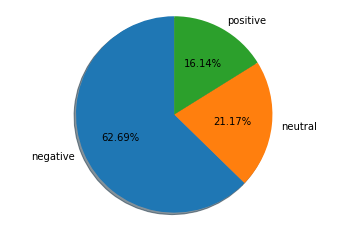

In [ ]:
createPieChartFor(tweets_df.airline_sentiment)


*from* above we can see that we have majority of negative comments (63%) followed by neutral (21%) and positive (16%)

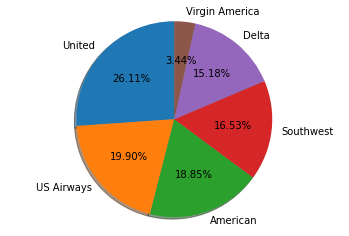

In [ ]:
createPieChartFor(tweets_df.airline)

Let us :

1.now check total tweets for each of the airlines and
2.how many of these tweets per airline are negative, positive and neutral


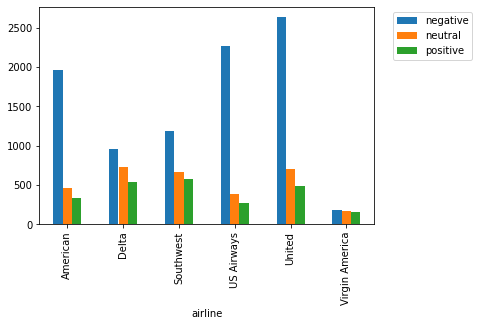

In [ ]:
airline_sentiment_df = tweets_df.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


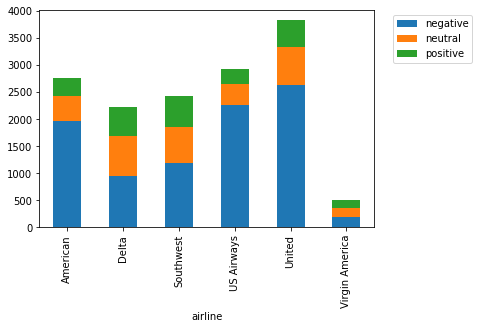

In [ ]:
airline_sentiment_df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

From above graph we can see that

United, US Airways and American have substatially negative tweets, these also have got over all more tweets
Virgin America, Delta and Southwest have fairly balanced tweets
Let's convert tweet_created to datetime check if we can get any insights

In [ ]:
tweets_df.tweet_created= tweets_df.tweet_created.apply(pd.to_datetime).dt.date

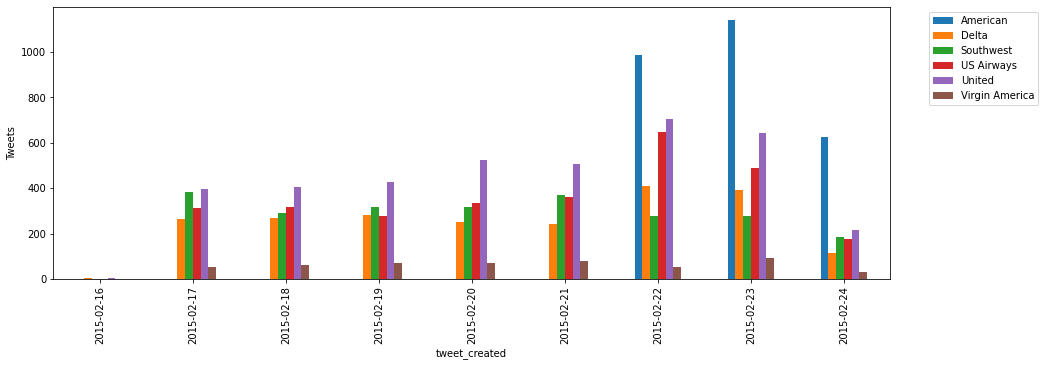

In [ ]:
temp_df = tweets_df.groupby(['tweet_created','airline']).airline_sentiment.count().unstack()
ax1 = temp_df.plot(kind='bar', figsize = (15,5))
ax1.set_ylabel('Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

For American we have the tweets coming in from 22-02-2015 onwards

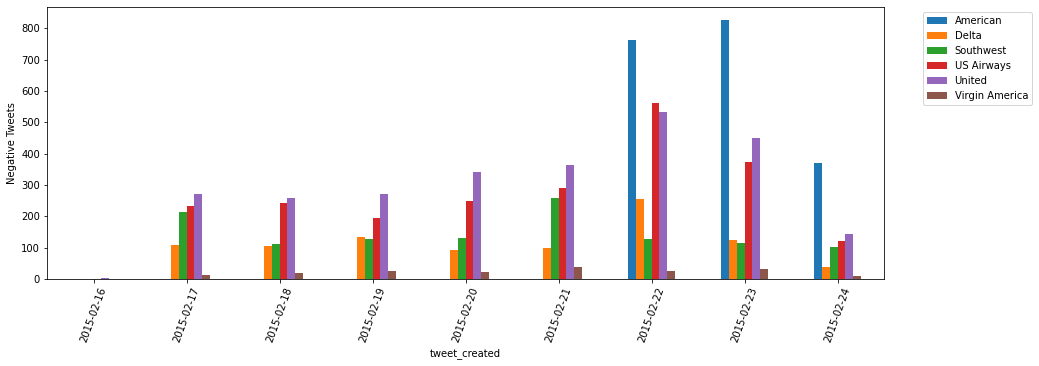

In [ ]:
neg_tweet_df = tweets_df.groupby(['tweet_created','airline','airline_sentiment']).size()
neg_tweet_df = neg_tweet_df.loc(axis=0)[:,:,'negative']
ax2 = neg_tweet_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar', figsize = (15,5), rot=70)
ax2.set_ylabel('Negative Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

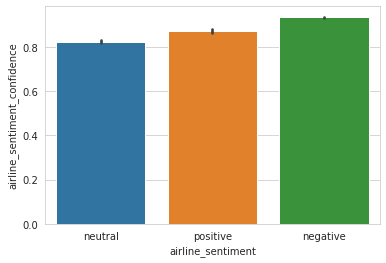

In [ ]:
sns.set_style("whitegrid")
ax = sns.barplot(x="airline_sentiment", y="airline_sentiment_confidence", data=tweets_df)


In [ ]:
tweets_df.negativereason.value_counts()

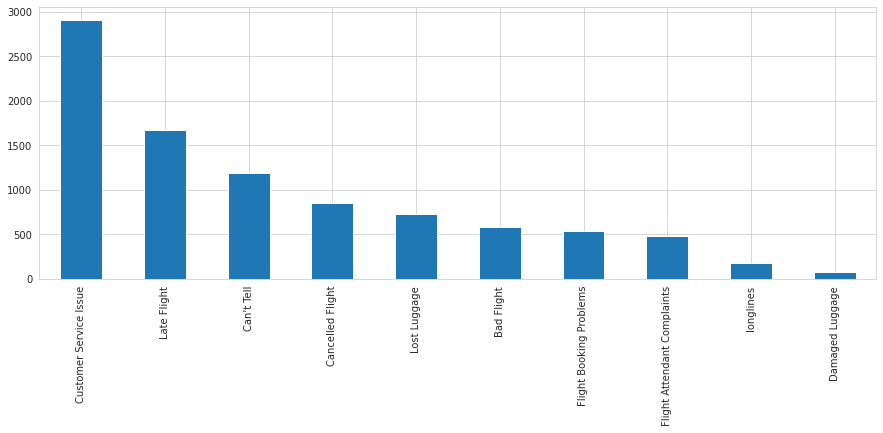

In [ ]:
tweets_df.negativereason.value_counts().plot(kind='bar', figsize=(15,5))

As we can see majority tweets have said the reason as

1.Customer servicec issue
2.Late flight

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

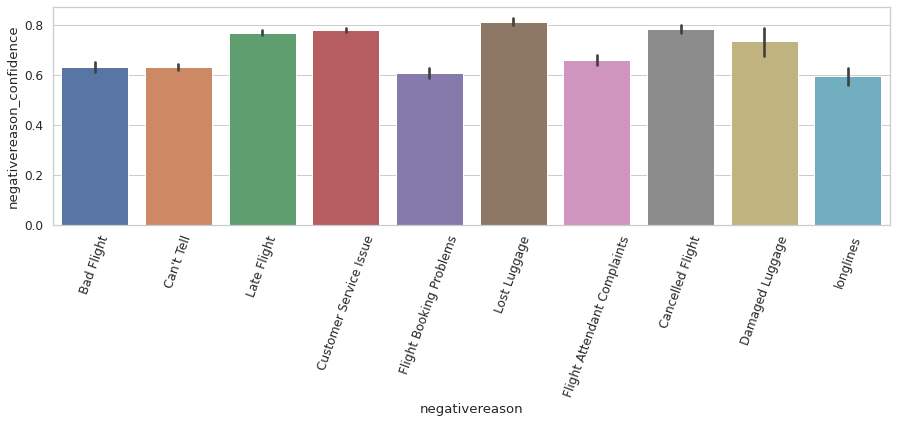

In [ ]:
plt.figure(figsize=(15, 4))
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")
ax = sns.barplot(x="negativereason", y="negativereason_confidence", data=tweets_df)
plt.xticks(rotation=70)

In [ ]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    temp_df = tweets_df[tweets_df.airline_sentiment==sentiment]
    words = " ".join(temp_df.text)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

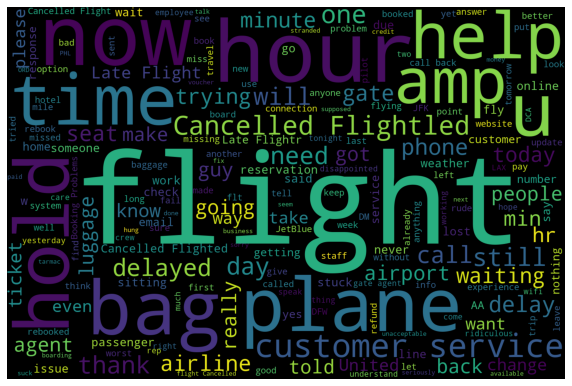

In [ ]:
createWrdCloudForSentiment('negative')

we observe that 'flight', 'hour', 'hrlp', 'time' 'hold', 'bag', 'plane' are present more frequently in negative statements.

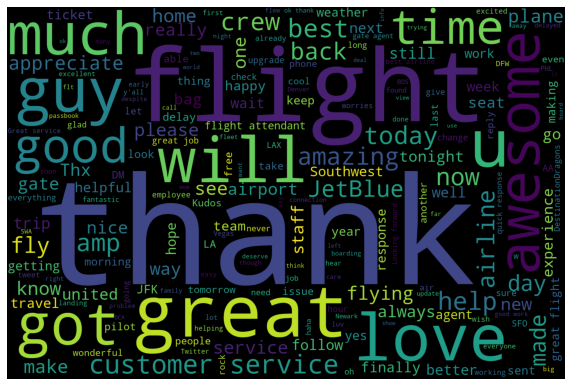

In [ ]:
createWrdCloudForSentiment('positive')


we observe that 'thank', 'flight', 'great', 'will', 'awesome' 'love' are present more frequently in positve statements.

we'll do more detailed analysis below

In [ ]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

Let us start analysing the tweets,
We'll now clean up the text data
for this we'll follow the below steps:

1.Remove all the special characters 

2.convert all letters to lower case

3.filter out english stop words

4.stemmer (optional)

In [ ]:
tweets_df.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#nltk.download('wordnet')

In [ ]:
## We'll check latter if stemmer will make any difference
#from nltk.stem.porter import PorterStemmer
#stemmer = PorterStemmer()
#
#from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer() 

In [ ]:
def process_message(tweet):
    # remove all the special characters
    new_tweet = re.sub("[^a-zA-Z]", " ",tweet) 
    # convert all letters to lower case
    words = new_tweet.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]        
    # stemming
    #words = [stemmer.stem(word) for word in words]
    # lemmatizer
    #words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [ ]:
tweets_df['clean_tweet']=tweets_df['text'].apply(lambda x: process_message(x))


In [ ]:
tweets_df['clean_tweet'].to_list()

['virginamerica dhepburn said',
 'virginamerica plus added commercials experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seats playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teens',
 'virginamerica lt pretty graphics much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule st

Make test-train split

In [ ]:
train_df, test_df = train_test_split(tweets_df, test_size=0.3, random_state=42)
print(train_df.shape,test_df.shape)
print(train_df.shape,test_df.shape)

(10248, 13) (4392, 13)
(10248, 13) (4392, 13)


In [ ]:
train_tweets =[]
for tweet in train_df.clean_tweet:
    train_tweets.append(tweet)
    
test_tweets =[]
for tweet in test_df.clean_tweet:
    test_tweets.append(tweet)

TF-IDF technique to create features from the text

In [ ]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [ ]:
# let's look at the dataframe
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaand,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aakjumxa,...,zv,zvfmxnuelj,zvhco,zwmuoon,zwzc,zxzn,zy,zz,zza,zzkqwwbjz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(vectorizer.get_feature_names())

['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aateam', 'aau', 'aavvoreph', 'aay', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcnetwork', 'abcnews', 'abi', 'abigailedge', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abprg', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdly', 'abt', 'abundance', 'abuse', 'abused', 'abysmal', 'ac', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accidents', 'accomidating', 'accommodate', 'accommodated', 'accommodates', 'accommodating', 'accommodation', 'accommodations', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accounts', 'accrue', 'acct', 'accts', 'accumulation', 'accurate', 'accurately', 'acebo', 'acfqcdq', 'achieve', 'achieves', 'ac

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now we''ll apply model to predicit sentiments from tweet text data

In [ ]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [ ]:
lbl_actual = test_df.airline_sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.airline_sentiment)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  Accuracy Score : 79.1%
              precision    recall  f1-score   support

    negative       0.93      0.81      0.87      3232
     neutral       0.48      0.66      0.56       648
    positive       0.60      0.81      0.69       512

    accuracy                           0.79      4392
   macro avg       0.67      0.76      0.71      4392
weighted avg       0.83      0.79      0.80      4392

MultinomialNB  Accuracy Score : 69.69%
              precision    recall  f1-score   support

    negative       0.99      0.69      0.81      4081
     neutral       0.15      0.78      0.26       174
    positive       0.18      0.93      0.31       137

    accuracy                           0.70      4392
   macro avg       0.44      0.80      0.46      4392
weighted avg       0.94      0.70      0.77      4392

DecisionTreeClassifier  Accuracy Score : 66.8%
              precision    recall  f1-score   support

    negative       0.79      0.78      0.78      2843


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

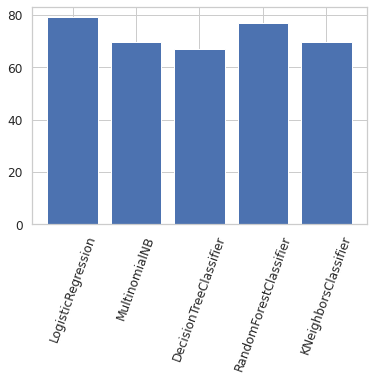

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

Output

In [ ]:
# Save to csv

lg_model = LogisticRegression().fit(train_tfidf_model,train_df.airline_sentiment)
lg_lbl_pred = model.predict(test_tfidf_model)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lg_lbl_pred_df = pd.DataFrame({'tweet_id': test_df.tweet_id,
                            'text' : test_df.text,
                            'lg_reg' : lg_lbl_pred})
lg_lbl_pred_df.head()


,tweet_id,text,lg_reg
4794,5.697310e+17,@SouthwestAir you're my early frontrunner for ...,positive
10480,5.692630e+17,@USAirways how is it that my flt to EWR was Ca...,negative
8067,5.688190e+17,@JetBlue what is going on with your BDL to DCA...,negative
8880,5.677760e+17,@JetBlue do they have to depart from Washingto...,negative
8292,5.685270e+17,@JetBlue I can probably find some of them. Are...,neutral


**LSTM**

In [ ]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical

import re


from subprocess import check_output

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [ ]:
#load the data
from google.colab import files
uploaded=files.upload()

In [ ]:
data = pd.read_csv('Tweets.csv')
# Keeping only the neccessary columns
data = data[['text','airline_sentiment']]
data.head()

In [ ]:
data = data[data.airline_sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['airline_sentiment'] == 'Positive'].size)
print(data[ data['airline_sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
#batch_size = 36
#Y_train = to_categorical(Y_train, 3)
#Y_test = to_categorical(Y_test, 3)
#model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)
X_train = tf.stack(X_train)
Y_train= tf.stack(Y_train)
model.fit(np.array(X_train), np.array(Y_train),batch_size=32, verbose=0, epochs=1)

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
X_test = tf.stack(X_test)
Y_test= tf.stack(Y_test)
acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
#print("score: %.2f" % (score))
print("acc: %.2f" % (acc))